In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [16]:
import src.models.LogisticRegression as LogReg
import src.features.build_features as FeaturesManager
import src.visualization.visualize as VizManager
import pickle
from comet_ml import API
import os

In [17]:
api = API()

workspace_name = "ift6758-a22-g08"

# Download the Logistic Regresion on Distance
api.download_registry_model(workspace_name, "logisticregression-distance", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance = pickle.load(file)


# Download the Logistic Regresion on Angle
api.download_registry_model(workspace_name, "logisticregression-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_angle = pickle.load(file)


# Download the Logistic Regresion on Distance and Angle
api.download_registry_model(workspace_name, "logisticregression-distance-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance_angle = pickle.load(file)

COMET INFO: Downloading registry model 'logisticregression-distance', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-distance-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!


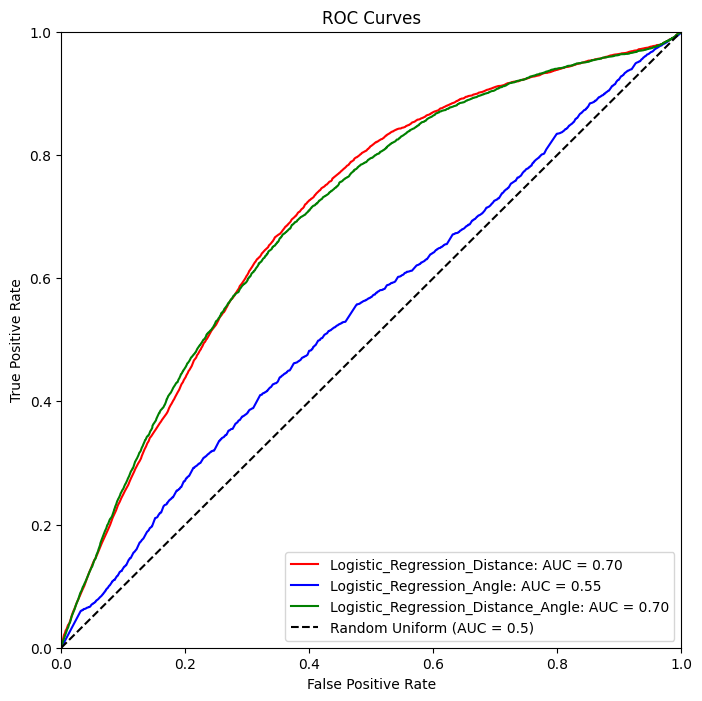

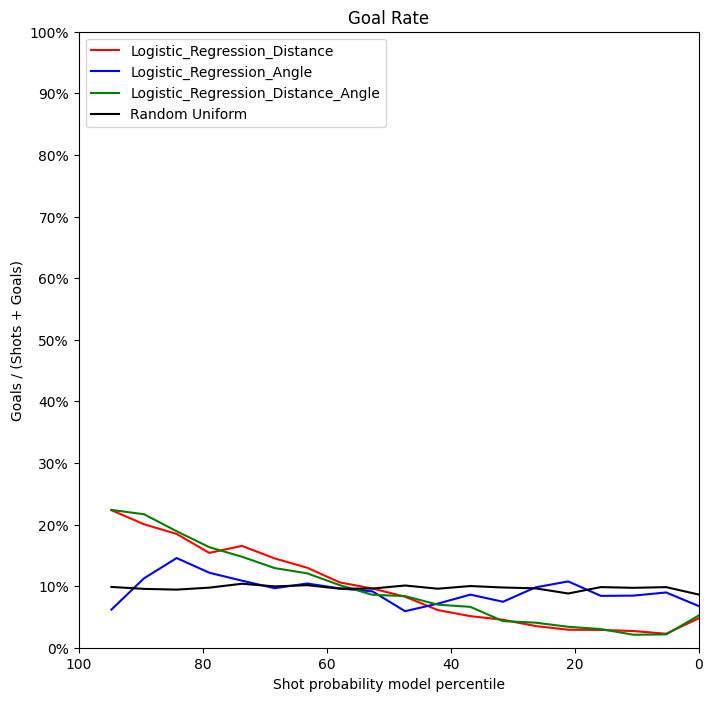

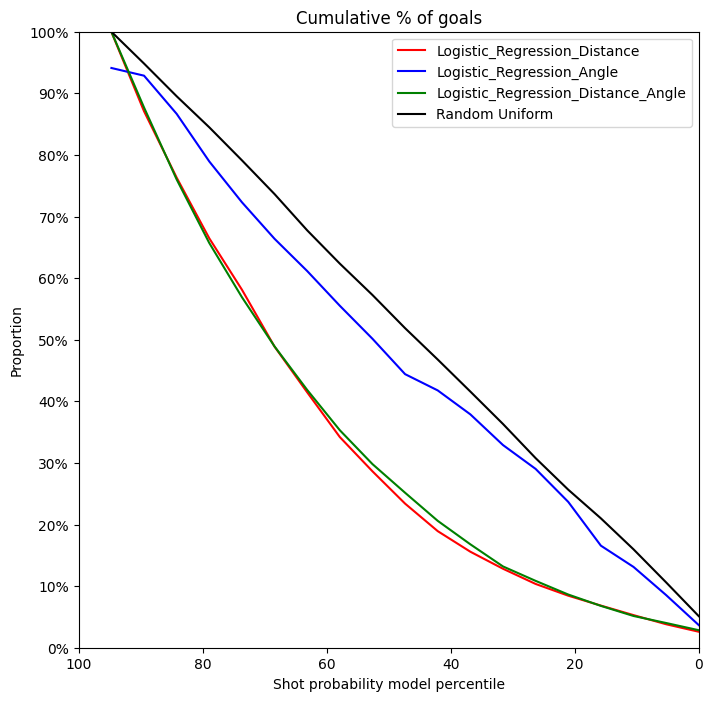

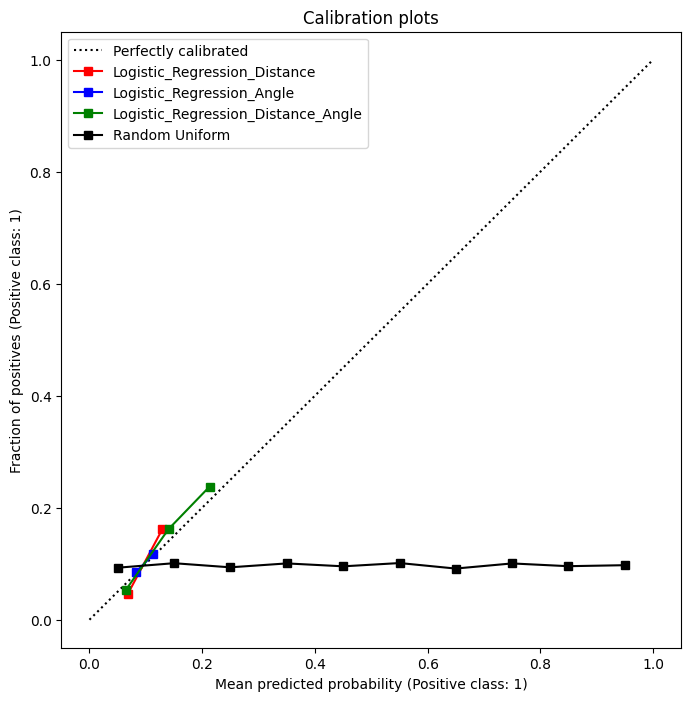

In [15]:
season_year = 2019
season_type = "Regular"    
features_data = FeaturesManager.build_features([season_year], season_type)

# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()

y_test = features_data['Is Goal']

classifiers = [(clf_distance, 'Logistic_Regression_Distance', features_data[['Shot distance']], y_test),
               (clf_angle, 'Logistic_Regression_Angle', features_data[['Shot angle']], y_test),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', features_data[['Shot distance', 'Shot angle']], y_test) ]


VizManager.plot_all_figures(classifiers, add_random=True)

In [4]:

LogReg.DoTesting(season_year, season_type)


COMET INFO: Downloading registry model 'logisticregression-distance', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!


--------------------------------
Logistic Regression - Distance
{'precision': 0.0, 'recall': 0.0, 'macro f1': 0.4745238133125408, 'accuracy': 0.9030358089181618}


COMET INFO: Downloading registry model 'logisticregression-distance-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!


--------------------------------
Logistic Regression - Angle
{'precision': 0.0, 'recall': 0.0, 'macro f1': 0.4745238133125408, 'accuracy': 0.9030358089181618}
LogisticRegression(random_state=42)
--------------------------------
Logistic Regression - Distance/Angle
{'precision': 0.0, 'recall': 0.0, 'macro f1': 0.4745238133125408, 'accuracy': 0.9030358089181618}
